<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

**Входные данные:**

- Набор данных находится в файле:

https://code.s3.yandex.net/datasets/insurance.csv

**Признаки:**

`Пол`

`Возраст`

`Зарплата`

`Члены семьи`

**Целевой признак:**

`Страховые выплаты` — количество страховых выплат клиенту за последние 5 лет

**Условия задачи:**

- Защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

- Подбирать наилучшую модель не требуется.

**Цель исследования:**
        
- Защитить данные клиентов страховой компании «Хоть потоп».

- Разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

**Задачи:**

- Ответить на вопрос: *Изменится ли качество линейной регрессии, при умножении признаков на обратимую матрицу?*

- Предложить алгоритм преобразования данных для решения задачи.

- Запрограммировать алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

**Этапы исследования:**

- Подготовка данных

- Умножение матриц

- Алгоритм преобразования

- Проверка алгоритма

- Общий вывод

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


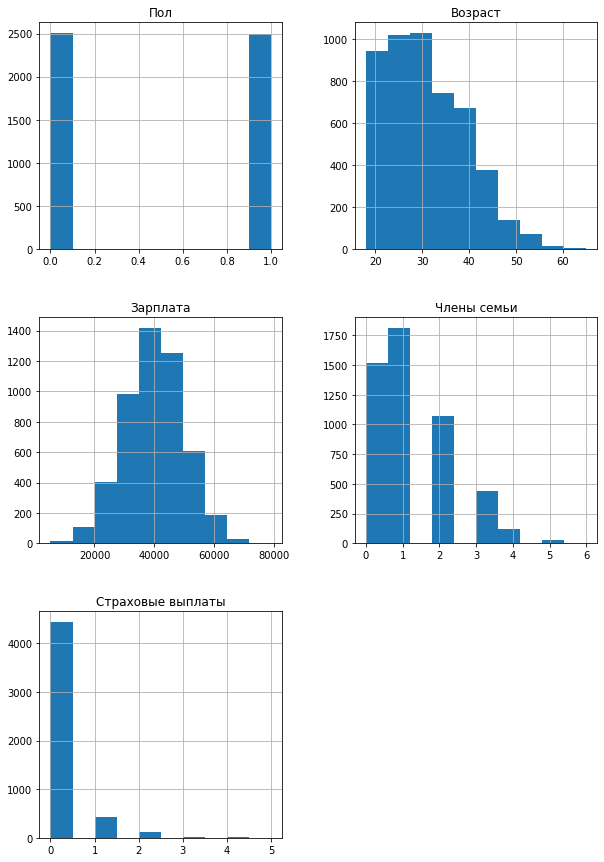

In [6]:
df.hist(figsize=(10, 15));

Выбросов и аномалий нет.

Проверим пропуски

In [7]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Проверим наличие дубликатов

In [8]:
df.duplicated().sum()

153

Удалим полные дубликаты

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Вывод

- Размер датасета 5 столбцов (4 признака + 1 целевой) и 5000 строк.

- Типы данных устраивают. Оставляем без изменения.

- Пропусков нет.

- Выбросов и аномалий нет.

- Избавились от 153 дубликатов.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $A$ — любая матрица

- $A^{-1}$ — обратная матрица

- $E$ - единичная матрица

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Изменится ли качество линейной регрессии, при умножении признаков на обратимую матрицу?

**Ответ:** Качество линейной регрессии не изменится.

**Обоснование:** 

1. Умножим нашу матрицу на обратимую матрицу P и получим новую матрицу признаков A:

$$
XP = A
$$

2. Формула обучения для матрицы A:

$$
w = ((XP)^T XP)^{-1} (XP)^T y
$$

3. Формула предсказания:

$$
a = XPw
$$

Подставим значение w:

$$
a = XP((XP)^T XP)^{-1} (XP)^T y
$$

4. Дл раскрытия скобок, воспользуемся свойствами матриц:

$$
A(BС) = (AB)С
$$

$$
(AB)^{-1} = A^{-1} B^{-1}
$$

$$
(AB)^T = A^T B^T
$$

$$
AE = EA = A
$$

$$
A A^{-1} = E
$$

5. Преобразуем нашу формулу:

$$
w' = XP((XP)^T XP)^{-1} (XP)^T y
$$

$$
w' = (P^T(X^T X) P)^{-1} X^T P^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} X^T P^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$

*Разберем:*

$P^T (P^T)^{-1} = E$, которые можно исключить, т.к. $AE = EA = A$. 

$(X^T X)^{-1} X^T y =w$ (заменим). 

В итоге получаем исходную формулу предсказания.

$$
w' = P^{-1}w
$$

Делаем вывод, что умножение признаков на обратимую матрицу влияния на предсказания не оказывает.

## Алгоритм преобразования

**Алгоритм**

Умножим матрицу признаков (размером **5000 x 4**) на на любую квадратную обратимую матрицу, размер которой, будет соответствовать ширине матрицы признаков, т.е. **4 x 4**.

Сравним качество модели на полученной матрице и на матрице исходных данных.

Метрику качества используем **r2**

**Обоснование**

На предыдущем этапе, мы установили, что умножение признаков на любую квадратную обратимую матрицу влияния на предсказания не оказывает. Следовательно, и метрика r2 на обеих моделях будет равна.

## Проверка алгоритма

Подготовим данные

In [10]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Создадим матрицу размером 4х4 методом random.normal()

In [11]:
matrix_random = np.random.normal(size=(4, 4))
matrix_random

array([[ 0.46662442, -0.65350404,  0.59088831, -1.16835445],
       [ 0.62739266, -0.89355938,  1.04777926,  1.59150982],
       [ 0.71599754, -0.45932511, -0.68678072, -0.23215703],
       [ 0.25739284,  0.61294929,  1.00782954,  0.32713405]])

Проверим данную матрицу на обратимость. Сделаем обратную ей матрицу методом linalg.inv(). 

In [12]:
matrix_random_inv = np.linalg.inv(matrix_random)
matrix_random_inv

array([[-0.02246811, -0.01603701,  1.13626584,  0.80414874],
       [-0.37952653, -0.41029272,  0.30002859,  0.85352514],
       [ 0.38516067,  0.15566427, -0.48575676,  0.27356103],
       [-0.45780209,  0.30181328,  0.04032295, -0.01789069]])

Преобразуем наши исходные признаки в матрицу и умножим ее на созданную обратную матрицу (matrix_random_inv)

In [13]:
matrix = features.values
matrix_for_test = matrix @ matrix_random_inv

Преобразуем matrix_new в датафрейм

In [14]:
features_for_test = pd.DataFrame (matrix_for_test, columns = features.columns)
features_for_test

,Пол,Возраст,Зарплата,Члены семьи
0,19087.928376,7704.411423,-24080.057467,13604.408114
1,14618.189439,5896.670498,-18444.915190,10434.563588
2,8077.367802,3257.051120,-10192.191102,5769.533960
3,16052.314280,6483.187418,-20249.675589,11425.383397
4,10042.044277,4051.333138,-12668.714334,7164.645861
...,...,...,...,...
4842,13738.693574,5546.329766,-17333.034837,9789.991865
4843,20169.057406,8143.159457,-25443.412857,14363.600187
4844,13048.440580,5269.416427,-16461.072900,9290.753801
4845,12585.008452,5082.084497,-15876.388144,8964.973867


Обучим модель на исходных признаках

In [15]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

0.4302010044852066

Теперь обучим на измененных признаках

In [16]:
model = LinearRegression()
model.fit(features_for_test, target)
predictions = model.predict(features_for_test)
r2_score(target, predictions)

0.43020100448520704

**Метрики r2 равны.** Разница с 11го знака после "." можно объяснить округлением.

## Вывод

- Загрузили данные:

    - Размер датасета 5 столбцов (4 признака + 1 целевой) и 5000 строк.

    - Типы данных устраивают. Оставили без изменения.

    - Пропусков нет.

    - Выбросов и аномалий нет.

    - Избавились от 153 дубликатов.
    
- Произвели расчет и ответили на вопрос: *Изменится ли качество линейной регрессии, при умножении признаков на обратимую матрицу?*

    - **Качество не изменится**. Вывод обосновали и проверили на следующем этапе.
    
- Предложили алгоритм преобразования данных для решения задачи, основываясь на предыдущем шаге.

- Запрограммировали алгоритм, применив матричные операции.

    - Согласно условиям, проверили, что качество линейной регрессии из *sklearn* не отличается до и после преобразования. 
    
    - Применили метрику R2.